# Final Project
# "Classifying The Brain on Music"

Michael Casey, https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2017.01179/full



#### Your objective is to classify fMRI brain images taken while listening to music in five different genres: label 0=Ambient Music, 1=Country Music, 2=Heavy Metal, 3=Rock 'n Roll, 4=Classical Symphonic. The data consists of train_data.csv,  train_labels.csv, and test_data.csv, for a one-person subset of a larger 20-subject study, linked above.

#### The training data (train_data.csv) consist of 160 event-related brain images (trials), corresponding to twenty 6-second music clips, four clips in each of the five genres, repeated in-order eight times (runs). The labels (train_labels.csv) correspond to the correct musical genres, listed above, for each of the 160 trials.

#### There are 22036 features in each brain image, corresponding to blood-oxygenation levels at each 2mm-cubed 3D location within a section of the auditory cortex. In human brain imaging, there are often many more features (brain sites) than samples (trials), thus making the task a relatively challenging multiway classification problem.

#### The testing data (test_data.csv) consists of 40 event-related brain images corresponding to novel 6-second music clips in the five genres. The test data is in randomized order with no labels. You must predict, using only the given brain images, the correct genre labels (0-4) for the 40 test trials.

## **1. Multi-Class Genre Classifier**

#### Build a multi-class classifier for the 5 music genres. Your goal is to train a model to classify brain images into corresponding genre categories. You are free to choose any machine learning models from the class.

#### **1-1. Hyper-parameter Search.**  Demonstrate your hyperparameter search process using cross-validation. Provide details for at least one hyperparameter with 10 different possible values.

#### **1-2. Model Training and Testing.** Following the hyperparameter search, train your model with the best combination of hyperparameters. Run the model on the test set and submit the results to the Kaggle competition. To get full marks, your model should outperform the baseline model, which is provided in Kaggle. You **must** show your test accuracy computed by Kaggle in this report.   

#### **1-3. Model Analysis.**  Conduct a thorough analysis of your model, including:

#### **1-3-1. Confusion Matrix:** Split the training set into train/validation sets. The data is organized into eight runs, in order, with each run repeating the same 20 music trials. You should split the data by run. Retrain your model using the best hyperparameter combination. Present the confusion matrix on the validation set.

#### **1-3-2. Example Examination:** Examine four validation samples where your model fails to classify into the correct category. Display the true label and the predicted label. Looking at the confusion matrix, how might you explain your results from the perspectives of human brain data and music genre similarity?



---

## **A. Data Download**
#### For your convenience, we have provided code to download the dataset, which includes true labels, training data (features), training labels, and testing data (features).

#### **A-1. Download Features and Labels.**
#### Run the following code to download the brain features and labels of the music clips.


In [1]:
import numpy as np
!pip install gdown

In [2]:
!gdown --id 1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J # train data
!gdown --id 11kgAdB_hkEcC4npCEWJcAOOmGe3495yY # train labels
!gdown --id 1wXq56F6RIUtDzPceZegZAMA-JGW21Gqu # test data

/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J
To: /Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/train_data.csv
100%|██████████████████████████████████████| 89.7M/89.7M [00:05<00:00, 17.3MB/s]
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11kgAdB_hkEcC4npCEWJcAOOmGe3495yY
To: /Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/train_labels.csv
100%|███████████████████████████████████████████|

In [3]:
# Data Import Method 1, with pandas
# reading in the training data and test data with pandas
import pandas as pd
import numpy as np
train_data = pd.read_csv("train_data.csv", header=None)
train_labels = pd.read_csv("train_labels.csv", header=None) # 5 classes!
test_data = pd.read_csv("test_data.csv", header=None)

print('train_data.shape: {}'.format(train_data.shape))
print('train_labels.shape: {}'.format(train_labels.shape))
print('test_data.shape: {}'.format(test_data.shape))

/var/folders/wx/ld6sw_dd7ks5nnls9bm6xyvm0000gn/T/ipykernel_10479/4187047447.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


train_data.shape: (160, 22036)
train_labels.shape: (160, 1)
test_data.shape: (40, 22036)


In [4]:
# what does our data look like?
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22026,22027,22028,22029,22030,22031,22032,22033,22034,22035
0,-0.742153,-0.776961,-1.482406,-2.372191,-1.397303,-1.511740,-2.833305,-1.207638,0.748228,-0.925093,...,1.700659,0.193262,-0.903444,-1.221330,-0.044282,0.356661,1.069074,1.587395,0.880437,-0.097743
1,0.706499,-3.121015,1.604055,-2.142794,-4.990133,1.331979,-0.729106,-4.301400,-0.815633,0.976097,...,-0.589694,0.620819,-0.236290,0.209095,1.578962,1.518740,0.758905,-2.542966,-0.663301,1.886257
2,-1.340712,-1.551577,-1.736186,-1.961429,-0.458469,-1.441798,-2.171387,-1.033950,0.810960,-0.617176,...,-0.974377,-3.684177,-3.495424,-0.952174,-0.096800,-0.298287,2.187289,2.551172,-0.350817,-3.836918
3,-2.076994,-0.372954,-3.075090,-1.484835,2.603373,-3.248855,-2.301153,2.445084,-0.603180,-2.452663,...,1.733859,0.144309,-1.581721,-0.899027,1.206200,2.770041,1.724285,1.244480,0.467999,-0.802804
4,1.234867,1.090594,2.437128,1.936450,-1.576794,3.414446,2.829384,-1.073482,1.495865,3.693113,...,-2.313220,-2.347912,-2.586554,-1.425429,-1.166489,-1.571365,-1.870989,-0.907339,-0.075931,-0.412944


# 1.1: Hyperparamter search with GridSearch Cross Validation

In [5]:
# lets split our data into test and training set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [56]:
# Trying SVM with a linear kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# lets try out several different values for the number of principal components:
for n_components in [10,20,30,40,50,60,70,80,90, 100, 110, 128]:

    # apply PCA to the data and transform it to the lower dimentional space
    pca = PCA(n_components=n_components)
    compressed_data = pca.fit_transform(X_train)
    
    param_grid = {
        'C': [0.00001, 0.0005, 0.001, .005, .01, 0.05],
        'kernel':["linear"] 
    }
    svm = SVC() # SVM model
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy') # Set up GridSearchCV
    grid_search.fit(compressed_data, y_train) # fit models to the lower dimentional space

    # Best parameters and best score
    print("\n")
    print(f"Number of components used: {n_components}")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("\n")


/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 10
Best Parameters: {'C': 1e-05, 'kernel': 'linear'}
Best Score: 0.5227692307692308




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 20
Best Parameters: {'C': 1e-05, 'kernel': 'linear'}
Best Score: 0.5929230769230769




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 30
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.6713846153846154




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 40
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.5932307692307692




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 50
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.6310769230769231




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 60
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.64




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 70
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.6476923076923077




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 80
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.6476923076923077




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 90
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.6476923076923077




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 100
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.6393846153846153




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P



Number of components used: 110
Best Parameters: {'C': 1e-05, 'kernel': 'linear'}
Best Score: 0.6396923076923077




Number of components used: 128
Best Parameters: {'C': 0.0005, 'kernel': 'linear'}
Best Score: 0.6473846153846153




/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrewkoulogeorge/Desktop/ML TA/Final_P

In [57]:
# function to create a submission dataframe
import pandas as pd
def make_sub(test_set_predictions):
        
    # Create a DataFrame with an ID and prediction
    submission_df = pd.DataFrame({
        'id': range(0,40),
        'Predictions': test_set_predictions
    })
    return submission_df

# 1.2: Training best model on ideal hyperparameters and generating predictions

In [59]:
# now that we have identified the best hyper parameters, lets train the the linear SVM on all of the data
pca = PCA(n_components=75)
compressed_train_data = pca.fit_transform(train_data) # take top 75 PCs
svm = SVC(C=0.00003, kernel='linear') # best hyperparemeters found
svm.fit(compressed_train_data, train_labels) # fit model

train_acc = accuracy_score(y_true=train_labels, y_pred=svm.predict(pca.transform(train_data)))
print(f"SVM Training Accuracy! {train_acc}") # test how well we fit the training data

SVM Training Accuracy! 1.0


/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


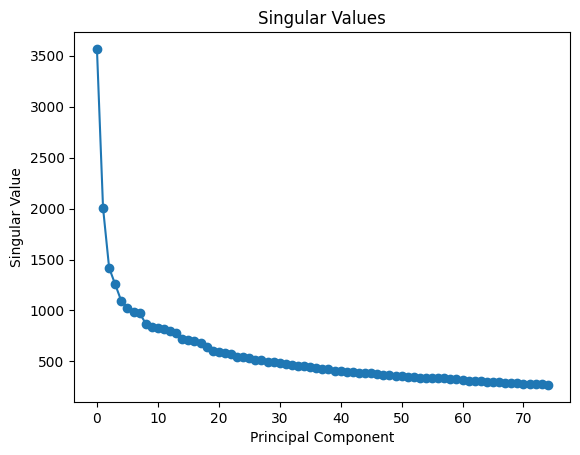

In [60]:
import matplotlib.pyplot as plt
singular_values = pca.singular_values_

# Plot the singular values
plt.plot(singular_values, marker='o')
plt.title('Singular Values')
plt.xlabel('Principal Component')
plt.ylabel('Singular Value')
plt.show()

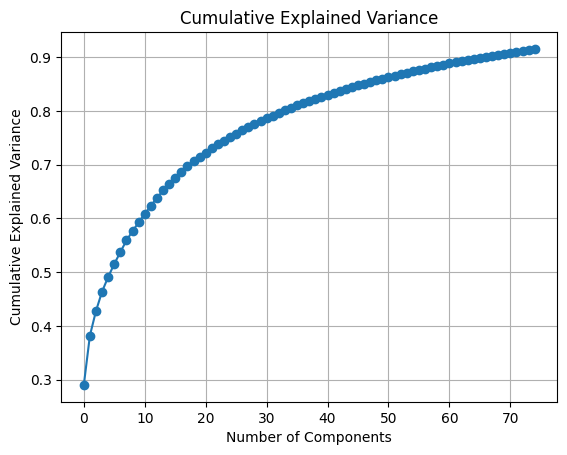

In [61]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [54]:
svm_test_set_predictions = svm.predict(pca.transform(test_data)) # make predictions on the test set
submission_df_svm = make_sub(svm_test_set_predictions) # make a submission file
submission_df_svm.to_csv('svm_submission_pca_pc=75.csv', index=False)
svm_test_set_predictions

array([3, 4, 2, 0, 0, 2, 2, 3, 4, 0, 4, 3, 1, 1, 3, 3, 2, 1, 3, 4, 1, 4,
       1, 2, 4, 3, 0, 4, 0, 4, 1, 2, 1, 0, 1, 4, 4, 4, 0, 0])

# 1.3: Analysis

In [63]:
# splitting the data to leave out the last 2 runs 
train_split_data, train_split_labels = train_data[:120], train_labels[:120]
val_split_data, val_split_labels = train_data[120:], train_labels[120:]
print(f"size of the training split: {train_split_data.shape}")
print(f"size of the val split: {val_split_data.shape}")

# retraining our model on this subset
svm_analysis = SVC(C=0.00003, kernel='linear')
svd_analysis = PCA(n_components=75)
low_dim_train_split = svd_analysis.fit_transform(train_split_data)
svm_analysis.fit(low_dim_train_split, train_split_labels)


size of the training split: (120, 22036)
size of the val split: (40, 22036)


/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3e-05, kernel='linear')

In [64]:
from sklearn.metrics import confusion_matrix
# confusion matrix for the models output! rows represent true label and columns recommend predicted label
confusion_matrix(y_true=val_split_labels, y_pred=svm_analysis.predict(svd_analysis.transform(val_split_data)))

array([[8, 0, 0, 0, 0],
       [0, 7, 0, 1, 0],
       [0, 1, 5, 0, 2],
       [0, 5, 0, 3, 0],
       [0, 0, 0, 0, 8]])

In [65]:
# model predictions on the validation set
svm_analysis.predict(svd_analysis.transform(val_split_data))

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 4, 4, 4, 4, 0, 0,
       0, 0, 1, 3, 1, 1, 2, 2, 4, 4, 3, 3, 1, 1, 4, 4, 4, 4])

In [58]:
# ground truth examples from the validation set
val_split_labels.to_numpy().squeeze()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

Recall the definition of a confusion matrix- c[i][j] is equal to the number of observations whose belong to group i but were predicted to be in group j. The model made a total of 9 mistakes on the valadation set (seen by elements in the confusion matrix which do not lie on the diag) and 5 of them were in the case when the model beleived rock and roll to be country music. This makes a lot of sence, since both of these music genres have similarities in tempo and instruments used.